In [1]:
import textblob as tb
import numpy as np
import pandas as pd
import nltk

In [2]:
from twitter_helper import TweetTimeLineHelper, processTweet

### Fetch tweets from Twitter
only for update

In [3]:
# timeLineHelper = TweetTimeLineHelper(items=5000)
# timeLineHelper.saveToCsv()

In [4]:
tweets = pd.read_csv('tweets.csv')

In [5]:
tweets['tweet_processed'] = tweets['text'].apply(processTweet)
tweets

,Unnamed: 0,created_at,text,retweet_count,favorite_count,retweeted,tweet_processed
0,0,2020-07-25 10:04:25,@teslacn Tesla will add a power lift gate at n...,29,393,False,tesla add power lift gate cost
1,1,2020-07-25 09:51:05,"@HansNoordsij Agreed, hydrogen fool sells make...",19,121,False,agreed hydrogen fool sell make sense
2,2,2020-07-25 03:42:29,Pronouns suck,12217,134988,False,pronoun suck
3,3,2020-07-25 03:35:00,"@historyofarmani Also, we get our lithium from...",170,2842,False,also get lithium australia
4,4,2020-07-25 03:32:18,@historyofarmani We will coup whoever we want!...,877,3663,False,coup whoever want deal
...,...,...,...,...,...,...,...
3223,3223,2019-08-27 07:29:21,@MemesOfMars @cleantechnica Hopefully next year,18,553,False,hopefully next year
3224,3224,2019-08-27 07:14:36,@cleantechnica ♥️♥️♥️,50,1454,False,♥️♥️♥️
3225,3225,2019-08-27 02:50:56,@teslaownersSV Appears to be a wiring/connecto...,70,1678,False,appears wiring/connector issue
3226,3226,2019-08-27 00:11:27,Igniters need to be inspected. We will try aga...,531,14533,False,igniter need inspected try tomorrow time


In [6]:
all_words = []
for sentence in tweets['tweet_processed'].tolist():
    all_words.extend(sentence.split())

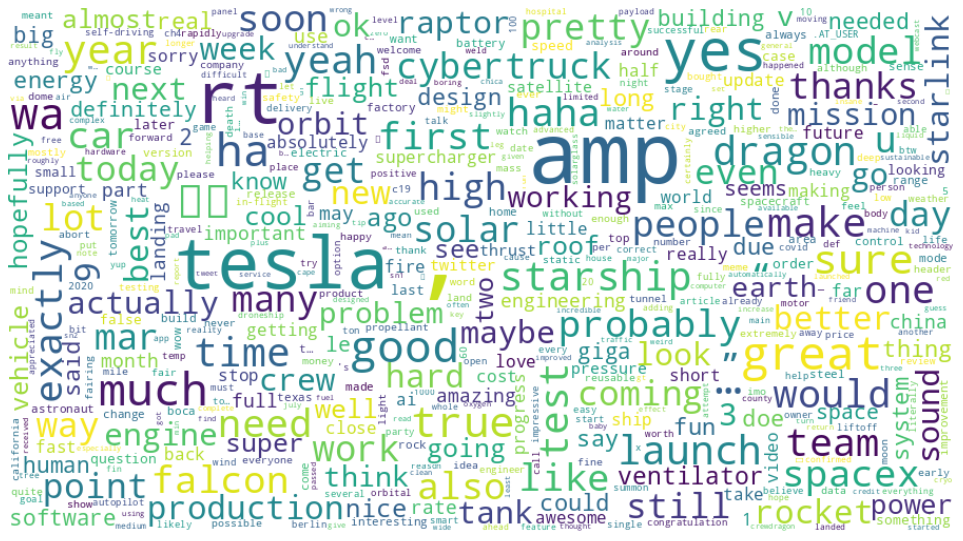

In [7]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordfreq = Counter(all_words)

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      background_color="white",
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

/usr/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0, flags=flags)


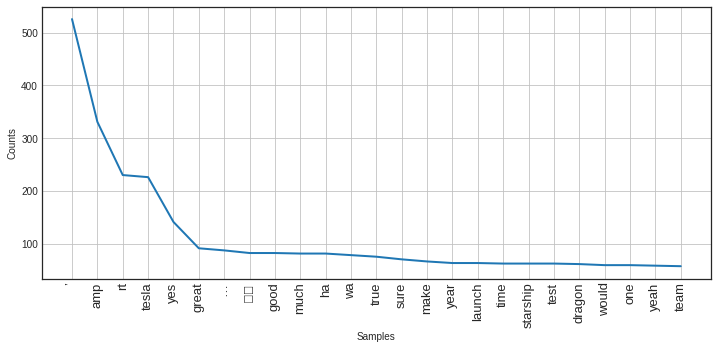

In [8]:
pd.set_option('display.max_colwidth', -1)
plt.style.use('seaborn-white')
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

In [9]:
import pickle

with open('classifier_trained.pkl', 'rb') as fid:
    cl = pickle.load(fid)
  

In [10]:
cl.predict(['This sucks','its awesome'])

array(['negative', 'positive'], dtype='<U8')

In [11]:
tweets['sentiment_classfication'] = cl.predict(tweets['tweet_processed'])
tweets['sentiment_probability_neg'] = list(map(lambda el: el[0], cl.predict_proba(tweets['tweet_processed'])))
tweets['sentiment_probability_pos'] = list(map(lambda el: el[1], cl.predict_proba(tweets['tweet_processed'])))

tweets

,Unnamed: 0,created_at,text,retweet_count,favorite_count,retweeted,tweet_processed,sentiment_classfication,sentiment_probability_neg,sentiment_probability_pos
0,0,2020-07-25 10:04:25,@teslacn Tesla will add a power lift gate at no cost,29,393,False,tesla add power lift gate cost,positive,0.394628,0.605372
1,1,2020-07-25 09:51:05,"@HansNoordsij Agreed, hydrogen fool sells make no sense",19,121,False,agreed hydrogen fool sell make sense,negative,0.505230,0.494770
2,2,2020-07-25 03:42:29,Pronouns suck,12217,134988,False,pronoun suck,positive,0.463178,0.536822
3,3,2020-07-25 03:35:00,"@historyofarmani Also, we get our lithium from Australia",170,2842,False,also get lithium australia,negative,0.517546,0.482454
4,4,2020-07-25 03:32:18,@historyofarmani We will coup whoever we want! Deal with it.,877,3663,False,coup whoever want deal,positive,0.371226,0.628774
...,...,...,...,...,...,...,...,...,...,...
3223,3223,2019-08-27 07:29:21,@MemesOfMars @cleantechnica Hopefully next year,18,553,False,hopefully next year,positive,0.482999,0.517001
3224,3224,2019-08-27 07:14:36,@cleantechnica ♥️♥️♥️,50,1454,False,♥️♥️♥️,positive,0.499708,0.500292
3225,3225,2019-08-27 02:50:56,@teslaownersSV Appears to be a wiring/connector issue,70,1678,False,appears wiring/connector issue,negative,0.723233,0.276767
3226,3226,2019-08-27 00:11:27,Igniters need to be inspected. We will try again tomorrow same time.,531,14533,False,igniter need inspected try tomorrow time,negative,0.709884,0.290116


In [14]:
tweets = pd.get_dummies(tweets, columns=['sentiment_classfication'])

tweets['positive_favourites'] = tweets['sentiment_classfication_positive'] * tweets['sentiment_probability_pos'] * tweets['favorite_count']
tweets['positive_popularity'] = tweets['sentiment_classfication_positive'] * tweets['sentiment_probability_pos'] * tweets['retweet_count']

tweets['negative_favourites'] = tweets['sentiment_classfication_negative'] * tweets['sentiment_probability_neg'] * tweets['favorite_count']
tweets['negative_popularity'] = tweets['sentiment_classfication_negative'] * tweets['sentiment_probability_neg'] * tweets['retweet_count']


tweets

,Unnamed: 0,created_at,text,retweet_count,favorite_count,retweeted,tweet_processed,sentiment_probability_neg,sentiment_probability_pos,sentiment_classfication_negative,sentiment_classfication_positive,positive_favourites,positive_popularity,negative_favourites,negative_popularity
0,0,2020-07-25 10:04:25,@teslacn Tesla will add a power lift gate at no cost,29,393,False,tesla add power lift gate cost,0.394628,0.605372,0,1,237.911074,17.555779,0.000000,0.000000
1,1,2020-07-25 09:51:05,"@HansNoordsij Agreed, hydrogen fool sells make no sense",19,121,False,agreed hydrogen fool sell make sense,0.505230,0.494770,1,0,0.000000,0.000000,61.132865,9.599376
2,2,2020-07-25 03:42:29,Pronouns suck,12217,134988,False,pronoun suck,0.463178,0.536822,0,1,72464.595429,6558.360464,0.000000,0.000000
3,3,2020-07-25 03:35:00,"@historyofarmani Also, we get our lithium from Australia",170,2842,False,also get lithium australia,0.517546,0.482454,1,0,0.000000,0.000000,1470.865084,87.982781
4,4,2020-07-25 03:32:18,@historyofarmani We will coup whoever we want! Deal with it.,877,3663,False,coup whoever want deal,0.371226,0.628774,0,1,2303.199876,551.434969,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,3223,2019-08-27 07:29:21,@MemesOfMars @cleantechnica Hopefully next year,18,553,False,hopefully next year,0.482999,0.517001,0,1,285.901613,9.306020,0.000000,0.000000
3224,3224,2019-08-27 07:14:36,@cleantechnica ♥️♥️♥️,50,1454,False,♥️♥️♥️,0.499708,0.500292,0,1,727.424841,25.014609,0.000000,0.000000
3225,3225,2019-08-27 02:50:56,@teslaownersSV Appears to be a wiring/connector issue,70,1678,False,appears wiring/connector issue,0.723233,0.276767,1,0,0.000000,0.000000,1213.585031,50.626312
3226,3226,2019-08-27 00:11:27,Igniters need to be inspected. We will try again tomorrow same time.,531,14533,False,igniter need inspected try tomorrow time,0.709884,0.290116,1,0,0.000000,0.000000,10316.740934,376.948286


In [15]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'])

In [16]:
tweets.dropna()

,Unnamed: 0,created_at,text,retweet_count,favorite_count,retweeted,tweet_processed,sentiment_probability_neg,sentiment_probability_pos,sentiment_classfication_negative,sentiment_classfication_positive,positive_favourites,positive_popularity,negative_favourites,negative_popularity
0,0,2020-07-25 10:04:25,@teslacn Tesla will add a power lift gate at no cost,29,393,False,tesla add power lift gate cost,0.394628,0.605372,0,1,237.911074,17.555779,0.000000,0.000000
1,1,2020-07-25 09:51:05,"@HansNoordsij Agreed, hydrogen fool sells make no sense",19,121,False,agreed hydrogen fool sell make sense,0.505230,0.494770,1,0,0.000000,0.000000,61.132865,9.599376
2,2,2020-07-25 03:42:29,Pronouns suck,12217,134988,False,pronoun suck,0.463178,0.536822,0,1,72464.595429,6558.360464,0.000000,0.000000
3,3,2020-07-25 03:35:00,"@historyofarmani Also, we get our lithium from Australia",170,2842,False,also get lithium australia,0.517546,0.482454,1,0,0.000000,0.000000,1470.865084,87.982781
4,4,2020-07-25 03:32:18,@historyofarmani We will coup whoever we want! Deal with it.,877,3663,False,coup whoever want deal,0.371226,0.628774,0,1,2303.199876,551.434969,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,3223,2019-08-27 07:29:21,@MemesOfMars @cleantechnica Hopefully next year,18,553,False,hopefully next year,0.482999,0.517001,0,1,285.901613,9.306020,0.000000,0.000000
3224,3224,2019-08-27 07:14:36,@cleantechnica ♥️♥️♥️,50,1454,False,♥️♥️♥️,0.499708,0.500292,0,1,727.424841,25.014609,0.000000,0.000000
3225,3225,2019-08-27 02:50:56,@teslaownersSV Appears to be a wiring/connector issue,70,1678,False,appears wiring/connector issue,0.723233,0.276767,1,0,0.000000,0.000000,1213.585031,50.626312
3226,3226,2019-08-27 00:11:27,Igniters need to be inspected. We will try again tomorrow same time.,531,14533,False,igniter need inspected try tomorrow time,0.709884,0.290116,1,0,0.000000,0.000000,10316.740934,376.948286


In [18]:
import math
from functools import reduce

tweets_groupper= tweets.groupby(pd.Grouper(key='created_at', freq='1D'))

tweets_gropuped = pd.DataFrame()
tweets_gropuped['sentiment_count_neg'] = tweets_groupper['sentiment_classfication_negative'].sum()
tweets_gropuped['sentiment_count_pos'] = tweets_groupper['sentiment_classfication_positive'].sum()
tweets_gropuped['strongest_sentiment_class'] = tweets_gropuped['sentiment_count_pos'].subtract(tweets_gropuped['sentiment_count_neg']).map(lambda val: 'positive' if val >= 0 else 'nagative')
tweets_gropuped['mean_positive'] = tweets_groupper['sentiment_probability_pos'].sum() / tweets_groupper['sentiment_classfication_positive'].count()
tweets_gropuped['mean_negative'] = tweets_groupper['sentiment_probability_neg'].sum() / tweets_groupper['sentiment_classfication_negative'].count()

tweets_gropuped['positive_favourites_avg'] = tweets_groupper['positive_favourites'].mean()
tweets_gropuped['positive_favourites_max'] = tweets_groupper['positive_favourites'].max()

tweets_gropuped['negative_favourites_avg'] = tweets_groupper['negative_favourites'].mean()
tweets_gropuped['negative_favourites_max'] = tweets_groupper['negative_favourites'].max()

tweets_gropuped['positive_popularity_avg'] = tweets_groupper['positive_popularity'].mean()
tweets_gropuped['positive_popularity_max'] = tweets_groupper['positive_popularity'].max()

tweets_gropuped['negative_popularity_avg'] = tweets_groupper['negative_popularity'].mean()
tweets_gropuped['negative_popularity_max'] = tweets_groupper['negative_popularity'].max()

tweets_gropuped['ratio_pos/neg'] = tweets_gropuped['sentiment_count_pos'] / (tweets_gropuped['sentiment_count_neg'] + tweets_gropuped['sentiment_count_pos'])
# tweets_gropuped = tweets_gropuped.dropna()
tweets_gropuped

,sentiment_count_neg,sentiment_count_pos,strongest_sentiment_class,mean_positive,mean_negative,positive_favourites_avg,positive_favourites_max,negative_favourites_avg,negative_favourites_max,positive_popularity_avg,positive_popularity_max,negative_popularity_avg,negative_popularity_max,ratio_pos/neg
created_at,,,,,,,,,,,,,,
2019-08-26,1,0,positive,0.424118,0.575882,0.000000,0.000000,1528.390760,1528.390760,0.000000,0.000000,82.927004,82.927004,0.000000
2019-08-27,7,8,positive,0.517324,0.482676,5630.767839,41633.637760,4400.235929,20502.152635,567.455596,4855.906173,284.395541,1732.946991,0.533333
2019-08-28,8,3,positive,0.436404,0.563596,2485.894412,23598.855705,3515.810023,14801.453473,1121.240117,10773.363292,142.748241,665.951933,0.272727
2019-08-29,1,3,positive,0.630189,0.369811,803.541955,1777.394237,160.733613,642.934453,76.238772,148.881007,5.783219,23.132877,0.750000
2019-08-30,0,9,positive,0.637080,0.362920,30276.211087,238631.425534,0.000000,0.000000,4578.986284,36872.397719,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-21,4,12,positive,0.584707,0.415293,13701.740761,154112.433608,699.885608,10133.643088,851.285721,6835.245651,222.729332,3235.969828,0.750000
2020-07-22,4,16,positive,0.560797,0.439203,33876.688389,198602.315479,2358.014230,23344.914576,3544.088609,27308.573462,81.205160,757.105396,0.800000
2020-07-23,3,10,positive,0.624433,0.375567,4657.980853,24919.770771,535.656152,3348.678470,400.170189,1772.648752,29.712511,202.070731,0.769231


In [38]:
prices = pd.read_csv('TSLA.csv')
prices['Date'] = pd.to_datetime(prices['Date'])
prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-25,233.500000,234.500000,225.550003,228.820007,228.820007,22418300
1,2019-07-26,226.919998,230.259995,222.250000,228.039993,228.039993,10027700
2,2019-07-29,227.089996,235.940002,226.029999,235.770004,235.770004,9273300
3,2019-07-30,232.899994,243.360001,232.179993,242.259995,242.259995,8109000
4,2019-07-31,243.000000,246.679993,236.649994,241.610001,241.610001,9178200


In [20]:
tweets_gropuped = tweets_gropuped.reset_index()
tweets_gropuped

,created_at,sentiment_count_neg,sentiment_count_pos,strongest_sentiment_class,mean_positive,mean_negative,positive_favourites_avg,positive_favourites_max,negative_favourites_avg,negative_favourites_max,positive_popularity_avg,positive_popularity_max,negative_popularity_avg,negative_popularity_max,ratio_pos/neg
0,2019-08-26,1,0,positive,0.424118,0.575882,0.000000,0.000000,1528.390760,1528.390760,0.000000,0.000000,82.927004,82.927004,0.000000
1,2019-08-27,7,8,positive,0.517324,0.482676,5630.767839,41633.637760,4400.235929,20502.152635,567.455596,4855.906173,284.395541,1732.946991,0.533333
2,2019-08-28,8,3,positive,0.436404,0.563596,2485.894412,23598.855705,3515.810023,14801.453473,1121.240117,10773.363292,142.748241,665.951933,0.272727
3,2019-08-29,1,3,positive,0.630189,0.369811,803.541955,1777.394237,160.733613,642.934453,76.238772,148.881007,5.783219,23.132877,0.750000
4,2019-08-30,0,9,positive,0.637080,0.362920,30276.211087,238631.425534,0.000000,0.000000,4578.986284,36872.397719,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2020-07-21,4,12,positive,0.584707,0.415293,13701.740761,154112.433608,699.885608,10133.643088,851.285721,6835.245651,222.729332,3235.969828,0.750000
331,2020-07-22,4,16,positive,0.560797,0.439203,33876.688389,198602.315479,2358.014230,23344.914576,3544.088609,27308.573462,81.205160,757.105396,0.800000
332,2020-07-23,3,10,positive,0.624433,0.375567,4657.980853,24919.770771,535.656152,3348.678470,400.170189,1772.648752,29.712511,202.070731,0.769231
333,2020-07-24,3,13,positive,0.607763,0.392237,17688.229959,72342.088807,30416.531592,422035.178690,1474.375176,6850.124996,3462.931483,51749.532944,0.812500


In [21]:
from workalendar.usa import NewYork
import datetime

cal = NewYork()

In [22]:

def stockValue(date, daysDifference, valueTime):
    date = cal.add_working_days(date,daysDifference)
    value = prices[prices['Date'] == date][valueTime].tolist()
    return None if len(value) == 0 else value[0]

tweets_gropuped['next_day_open'] = tweets_gropuped['created_at'].map(lambda date : stockValue(date,1,'Open')) 
tweets_gropuped['previous_day_open'] = tweets_gropuped['created_at'].map(lambda date : stockValue(date,-1,'Open')) 

tweets_gropuped


<ipython-input-22-2c0dbbebd0a9>:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  value = prices[prices['Date'] == date][valueTime].tolist()


,created_at,sentiment_count_neg,sentiment_count_pos,strongest_sentiment_class,mean_positive,mean_negative,positive_favourites_avg,positive_favourites_max,negative_favourites_avg,negative_favourites_max,positive_popularity_avg,positive_popularity_max,negative_popularity_avg,negative_popularity_max,ratio_pos/neg,next_day_open,previous_day_open
0,2019-08-26,1,0,positive,0.424118,0.575882,0.000000,0.000000,1528.390760,1528.390760,0.000000,0.000000,82.927004,82.927004,0.000000,215.740005,219.970001
1,2019-08-27,7,8,positive,0.517324,0.482676,5630.767839,41633.637760,4400.235929,20502.152635,567.455596,4855.906173,284.395541,1732.946991,0.533333,213.690002,213.600006
2,2019-08-28,8,3,positive,0.436404,0.563596,2485.894412,23598.855705,3515.810023,14801.453473,1121.240117,10773.363292,142.748241,665.951933,0.272727,219.000000,215.740005
3,2019-08-29,1,3,positive,0.630189,0.369811,803.541955,1777.394237,160.733613,642.934453,76.238772,148.881007,5.783219,23.132877,0.750000,229.149994,213.690002
4,2019-08-30,0,9,positive,0.637080,0.362920,30276.211087,238631.425534,0.000000,0.000000,4578.986284,36872.397719,0.000000,0.000000,1.000000,224.080002,219.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2020-07-21,4,12,positive,0.584707,0.415293,13701.740761,154112.433608,699.885608,10133.643088,851.285721,6835.245651,222.729332,3235.969828,0.750000,1599.000000,1519.010010
331,2020-07-22,4,16,positive,0.560797,0.439203,33876.688389,198602.315479,2358.014230,23344.914576,3544.088609,27308.573462,81.205160,757.105396,0.800000,1678.949951,1639.930054
332,2020-07-23,3,10,positive,0.624433,0.375567,4657.980853,24919.770771,535.656152,3348.678470,400.170189,1772.648752,29.712511,202.070731,0.769231,1416.010010,1599.000000
333,2020-07-24,3,13,positive,0.607763,0.392237,17688.229959,72342.088807,30416.531592,422035.178690,1474.375176,6850.124996,3462.931483,51749.532944,0.812500,NaN,1678.949951


In [23]:
tweets_gropuped = tweets_gropuped.dropna()

In [24]:
tweets_gropuped['price_change'] = (tweets_gropuped['next_day_open'] - tweets_gropuped['previous_day_open']) / (tweets_gropuped['previous_day_open'])
tweets_gropuped

<ipython-input-24-5a3405ec2bed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_gropuped['price_change'] = (tweets_gropuped['next_day_open'] - tweets_gropuped['previous_day_open']) / (tweets_gropuped['previous_day_open'])


,created_at,sentiment_count_neg,sentiment_count_pos,strongest_sentiment_class,mean_positive,mean_negative,positive_favourites_avg,positive_favourites_max,negative_favourites_avg,negative_favourites_max,positive_popularity_avg,positive_popularity_max,negative_popularity_avg,negative_popularity_max,ratio_pos/neg,next_day_open,previous_day_open,price_change
0,2019-08-26,1,0,positive,0.424118,0.575882,0.000000,0.000000,1528.390760,1528.390760,0.000000,0.000000,82.927004,82.927004,0.000000,215.740005,219.970001,-0.019230
1,2019-08-27,7,8,positive,0.517324,0.482676,5630.767839,41633.637760,4400.235929,20502.152635,567.455596,4855.906173,284.395541,1732.946991,0.533333,213.690002,213.600006,0.000421
2,2019-08-28,8,3,positive,0.436404,0.563596,2485.894412,23598.855705,3515.810023,14801.453473,1121.240117,10773.363292,142.748241,665.951933,0.272727,219.000000,215.740005,0.015111
3,2019-08-29,1,3,positive,0.630189,0.369811,803.541955,1777.394237,160.733613,642.934453,76.238772,148.881007,5.783219,23.132877,0.750000,229.149994,213.690002,0.072348
4,2019-08-30,0,9,positive,0.637080,0.362920,30276.211087,238631.425534,0.000000,0.000000,4578.986284,36872.397719,0.000000,0.000000,1.000000,224.080002,219.000000,0.023196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2020-07-19,4,16,positive,0.586369,0.413631,3226.467721,26229.819098,1358.208666,17413.005443,338.879320,3170.397461,47.755492,660.254087,0.800000,1519.010010,1513.449951,0.003674
329,2020-07-20,4,5,positive,0.555895,0.444105,2911.392628,10934.790853,9934.529982,53608.621557,711.481200,5254.985946,538.550294,2858.946272,0.555556,1639.930054,1513.449951,0.083571
330,2020-07-21,4,12,positive,0.584707,0.415293,13701.740761,154112.433608,699.885608,10133.643088,851.285721,6835.245651,222.729332,3235.969828,0.750000,1599.000000,1519.010010,0.052659
331,2020-07-22,4,16,positive,0.560797,0.439203,33876.688389,198602.315479,2358.014230,23344.914576,3544.088609,27308.573462,81.205160,757.105396,0.800000,1678.949951,1639.930054,0.023794


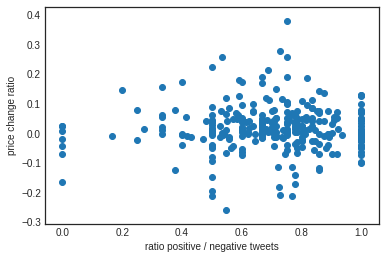

In [25]:
import matplotlib.pyplot as plt

plt.xlabel('ratio positive / negative tweets')
plt.ylabel('price change ratio')
plt.scatter(tweets_gropuped['ratio_pos/neg'], tweets_gropuped['price_change'])

In [26]:
import scipy as sp

In [27]:
chi2, p = sp.stats.chisquare(tweets_gropuped['ratio_pos/neg'], tweets_gropuped['price_change'])
[chi2, p]

[-9955.022460035074, 1.0]

In [28]:
chi2, p, dof, expected = sp.stats.chi2_contingency(pd.crosstab(tweets_gropuped['ratio_pos/neg'], tweets_gropuped['price_change']))
[chi2, p]

[20611.304586894585, 0.9642590727150123]

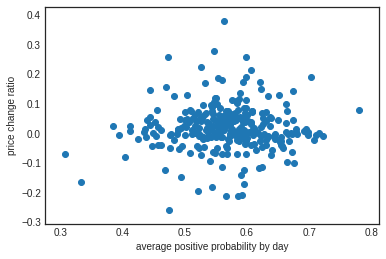

In [29]:
plt.xlabel('average positive probability by day')
plt.ylabel('price change ratio')
plt.scatter(tweets_gropuped['mean_positive'], tweets_gropuped['price_change'])

In [30]:
chi2, p = sp.stats.chisquare(tweets_gropuped['mean_positive'], tweets_gropuped['price_change'])
[chi2, p]

[-5058.917062973371, 1.0]

In [31]:
chi2, p, dof, expected = sp.stats.chi2_contingency(pd.crosstab(tweets_gropuped['mean_positive'], tweets_gropuped['price_change']))
[chi2, p]

[77658.0, 0.2902789864196578]

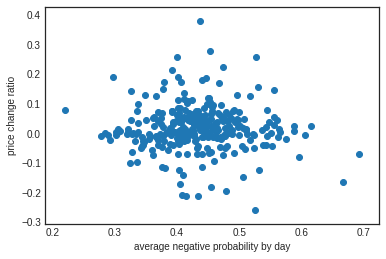

In [32]:
plt.xlabel('average negative probability by day')
plt.ylabel('price change ratio')
plt.scatter(tweets_gropuped['mean_negative'], tweets_gropuped['price_change'])

In [33]:
chi2, p = sp.stats.chisquare(tweets_gropuped['mean_negative'], tweets_gropuped['price_change'])
[chi2, p]

[-5583.04059930983, 1.0]

In [34]:
chi2, p, dof, expected = sp.stats.chi2_contingency(pd.crosstab(tweets_gropuped['mean_negative'], tweets_gropuped['price_change']))
[chi2, p]

[77658.0, 0.2902789864196578]

In [35]:
import seaborn

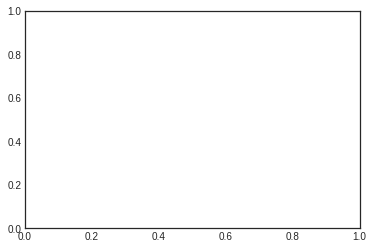

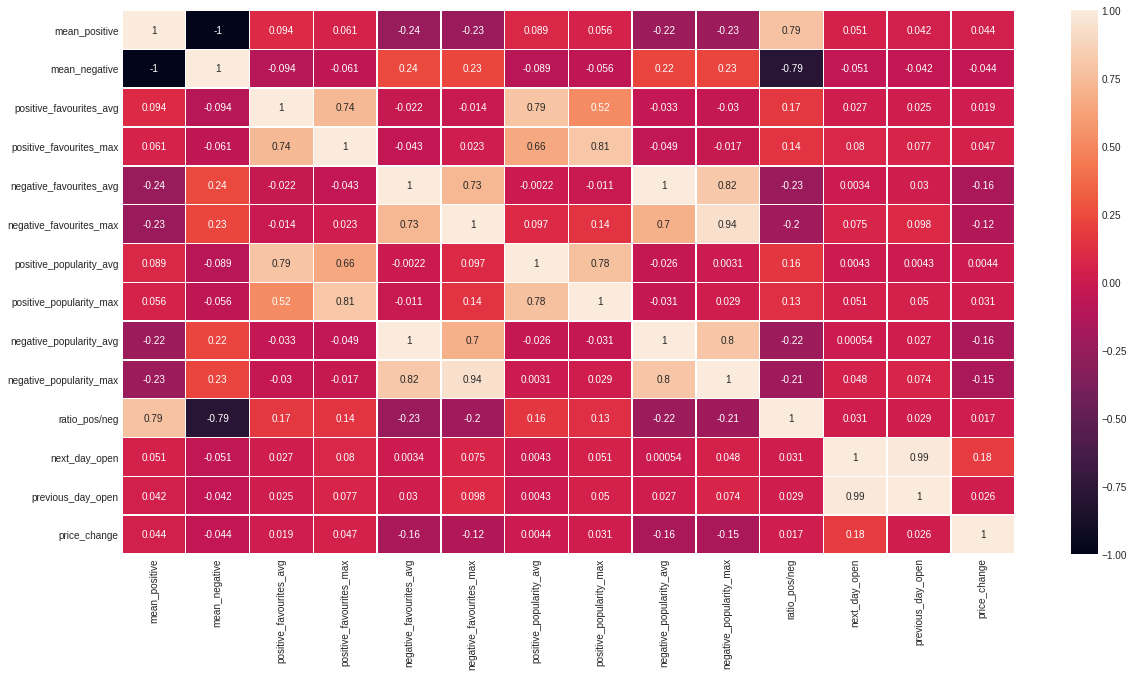

In [37]:

fig, ax = plt.subplots()
plt.figure(figsize=(20,10))

ax = seaborn.heatmap(tweets_gropuped.iloc[:, 4:].corr(), annot=True, linewidths=.5)
